<a href="https://colab.research.google.com/github/MattiyyahG/ProjetoFazenda/blob/main/Projeto_Fazenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Downloads de Dataset com Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FMfuftydamBlJ8Mhlcqq")
project = rf.workspace("projeto-fazenda").project("database-projeto-fazenda-netcon")
version = project.version(1)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Database:-Projeto-Fazenda---Netcon-1 in yolov5pytorch:: 100%|██████████| 4922/4922 [00:00<00:00, 8436.70it/s]


## 1.1. Verificando se há GPU disponivel para simulação no Colab


In [ ]:
!nvidia-smi

Fri Jul 19 22:34:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 2. Obtendo o Diretório de Trabalho Atual

In [ ]:
import os

# Obtém o diretório de trabalho atual
HOME = os.getcwd()

# Imprime o diretório de trabalho atual
print(HOME)


/content


## 3. Instalando YOLOv10 Diretamente do Repositório GitHub

In [5]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.8 MB/s eta 0:00:00


## 3.1. Instalando as Bibliotecas Supervision e Roboflow

In [6]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.1 MB/s eta 0:00:00


## 3.1.2. Executando Detecção de Objetos em uma Imagem Específica

In [7]:
# Muda para o diretório de trabalho atual
%cd {HOME}

# Executa a detecção de objetos com YOLOv10
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/train/weights/best.pt \
source={HOME}/database_projeto_fazenda_netcon/train/images/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg


/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/Database:-Projeto-Fazenda---Netcon-1/train/images/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg: 320x320 1 Folha, 17.0ms
Speed: 12.0ms preprocess, 17.0ms inference, 377.4ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## 3.2. Realizando Detecção de Objetos em Imagem usando a Biblioteca Ultralytics

In [8]:
from ultralytics import YOLOv10

# Carrega o modelo treinado
model = YOLOv10(f'{HOME}/train/weights/best.pt')

# Realiza a detecção de objetos na imagem especificada
results = model(source=f'{HOME}/database_projeto_fazenda_netcon/train/images/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg', conf=0.25)

# Mostra os resultados da detecção
results[0].show()



image 1/1 /content/Database:-Projeto-Fazenda---Netcon-1/train/images/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg: 320x320 1 Folha, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 196.6ms postprocess per image at shape (1, 3, 320, 320)


## 3.2.1 Exibindo a Imagem com Detecção de Objetos

/content


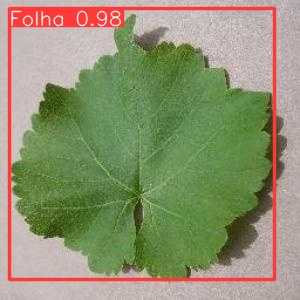

In [13]:
# Muda para o diretório de trabalho atual
%cd {HOME}

# Importa a função Image do IPython.display para exibir imagens
from IPython.display import Image

# Exibe a imagem resultante da detecção de objetos
Image(filename='runs/detect/predict/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg', height=600)


In [9]:
results[0].boxes.xyxy

tensor([[  9.4030,   8.9434, 274.3448, 279.1165]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.9781], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([0.], device='cuda:0')

## 4. Anotando e Exibindo Detecções de Objetos e Supervision


0: 320x320 1 Folha, 17.7ms
Speed: 1.2ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)


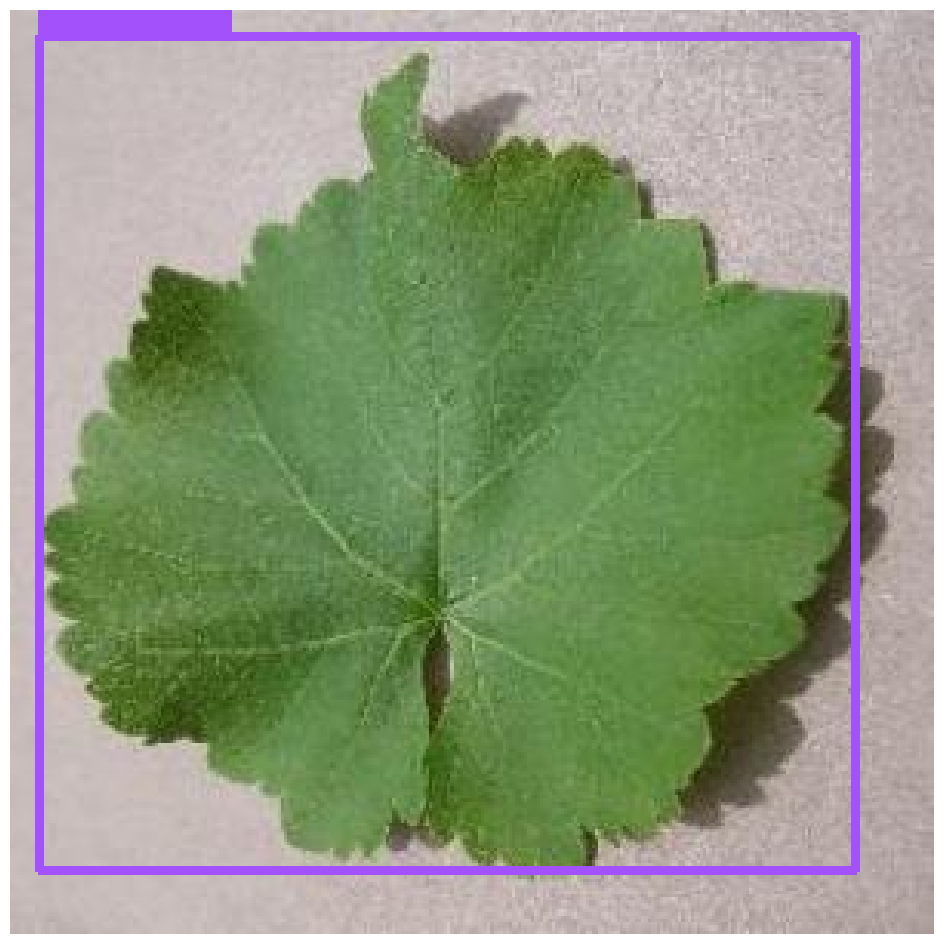

In [14]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

# Carrega o modelo YOLOv10 treinado
model = YOLOv10(f'{HOME}/train/weights/best.pt')

# Lê a imagem na qual será realizada a detecção
image = cv2.imread(f'{HOME}/database_projeto_fazenda_netcon/train/images/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt-N-V_HL-6103_JPG.rf.3b7b55e56ee449fb1c20c4c10a1ebfbb.jpg')

# Realiza a detecção de objetos na imagem
results = model(image)[0]

# Converte os resultados das detecções para o formato utilizado pela biblioteca Supervision
detections = sv.Detections.from_ultralytics(results)

# Inicializa o anotador de caixas delimitadoras e de rótulos
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Anota a imagem com as caixas delimitadoras
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)

# Anota a imagem com os rótulos
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Exibe a imagem anotada
sv.plot_image(annotated_image)


In [15]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## 4.1. Treinamento customizado


In [16]:
%cd {HOME}

!yolo task=detect mode=train epochs=1000 batch=32 plots=True \
model={HOME}/train/weights/best.pt \
data={dataset.location}/data.yaml \
save_period=10

/content
New https://pypi.org/project/ultralytics/8.2.60 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/train/weights/best.pt, data=/content/Database:-Projeto-Fazenda---Netcon-1/data.yaml, epochs=1, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=0, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

In [17]:
!ls {HOME}/train/

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1720895883.0c3d84e56e53.15413.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


## 4.2. Matrix de Confusão

/content


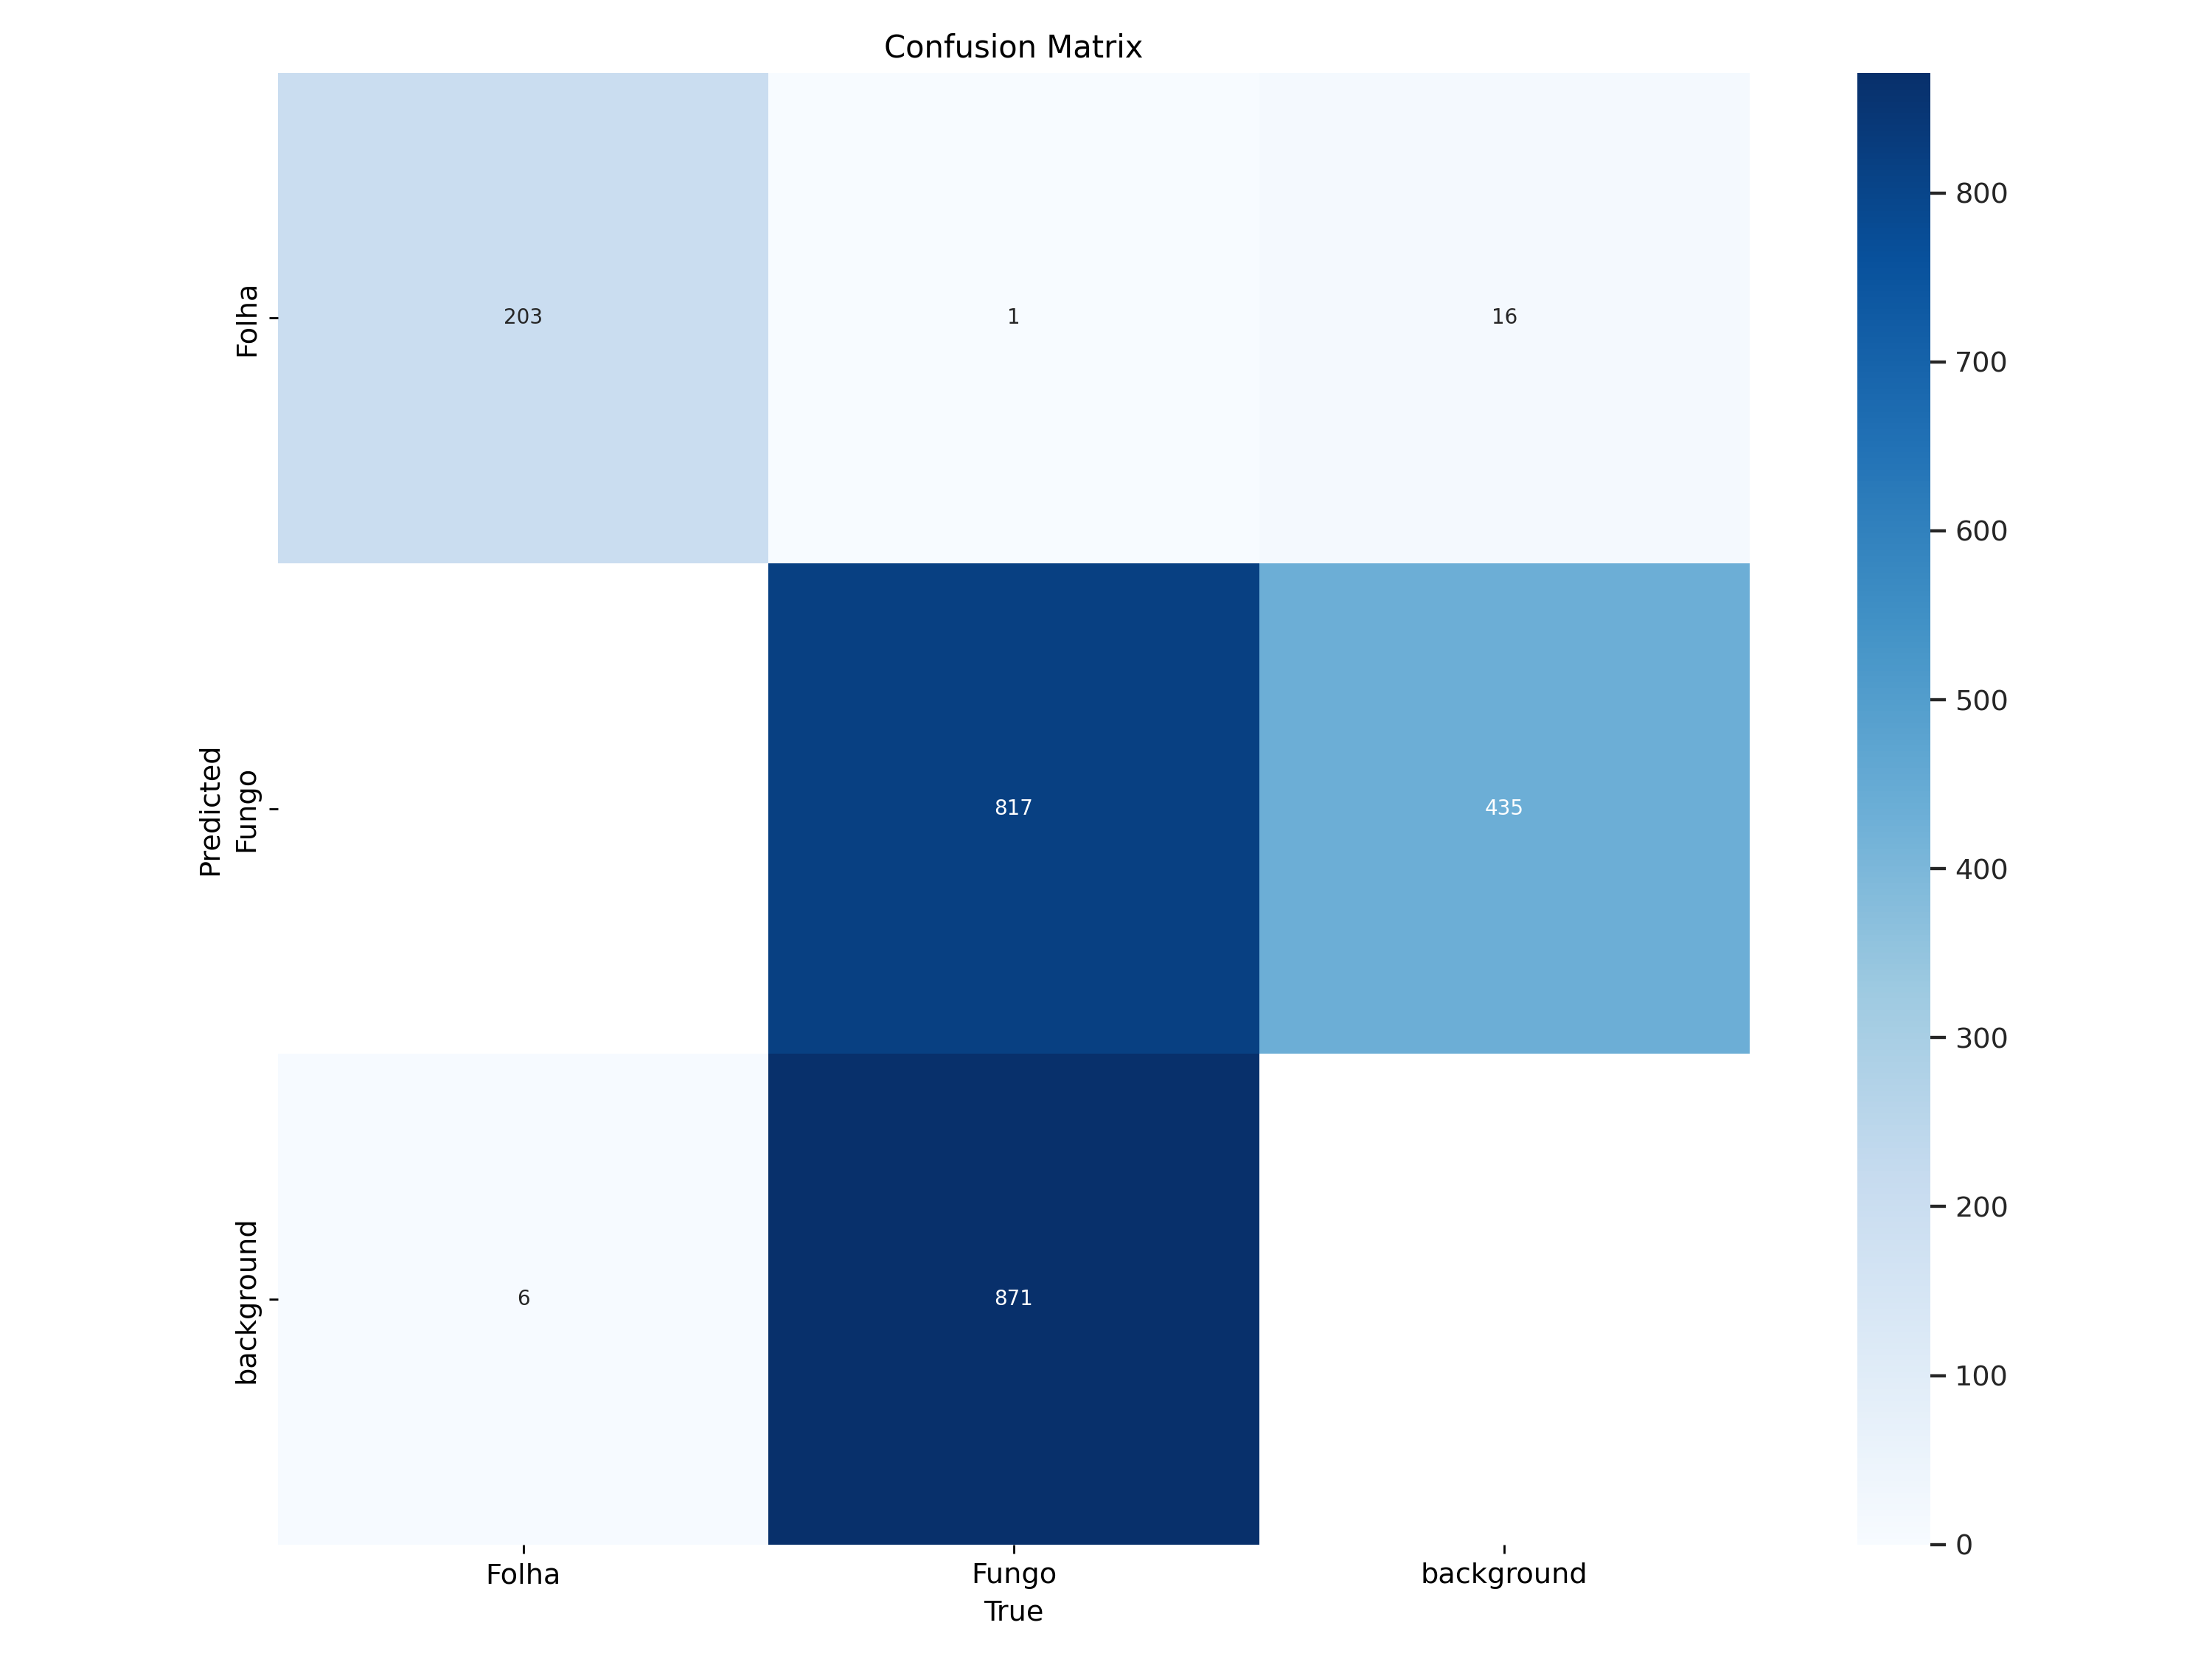

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/train/confusion_matrix.png', width=1000)

## 4.3. Resultados

/content


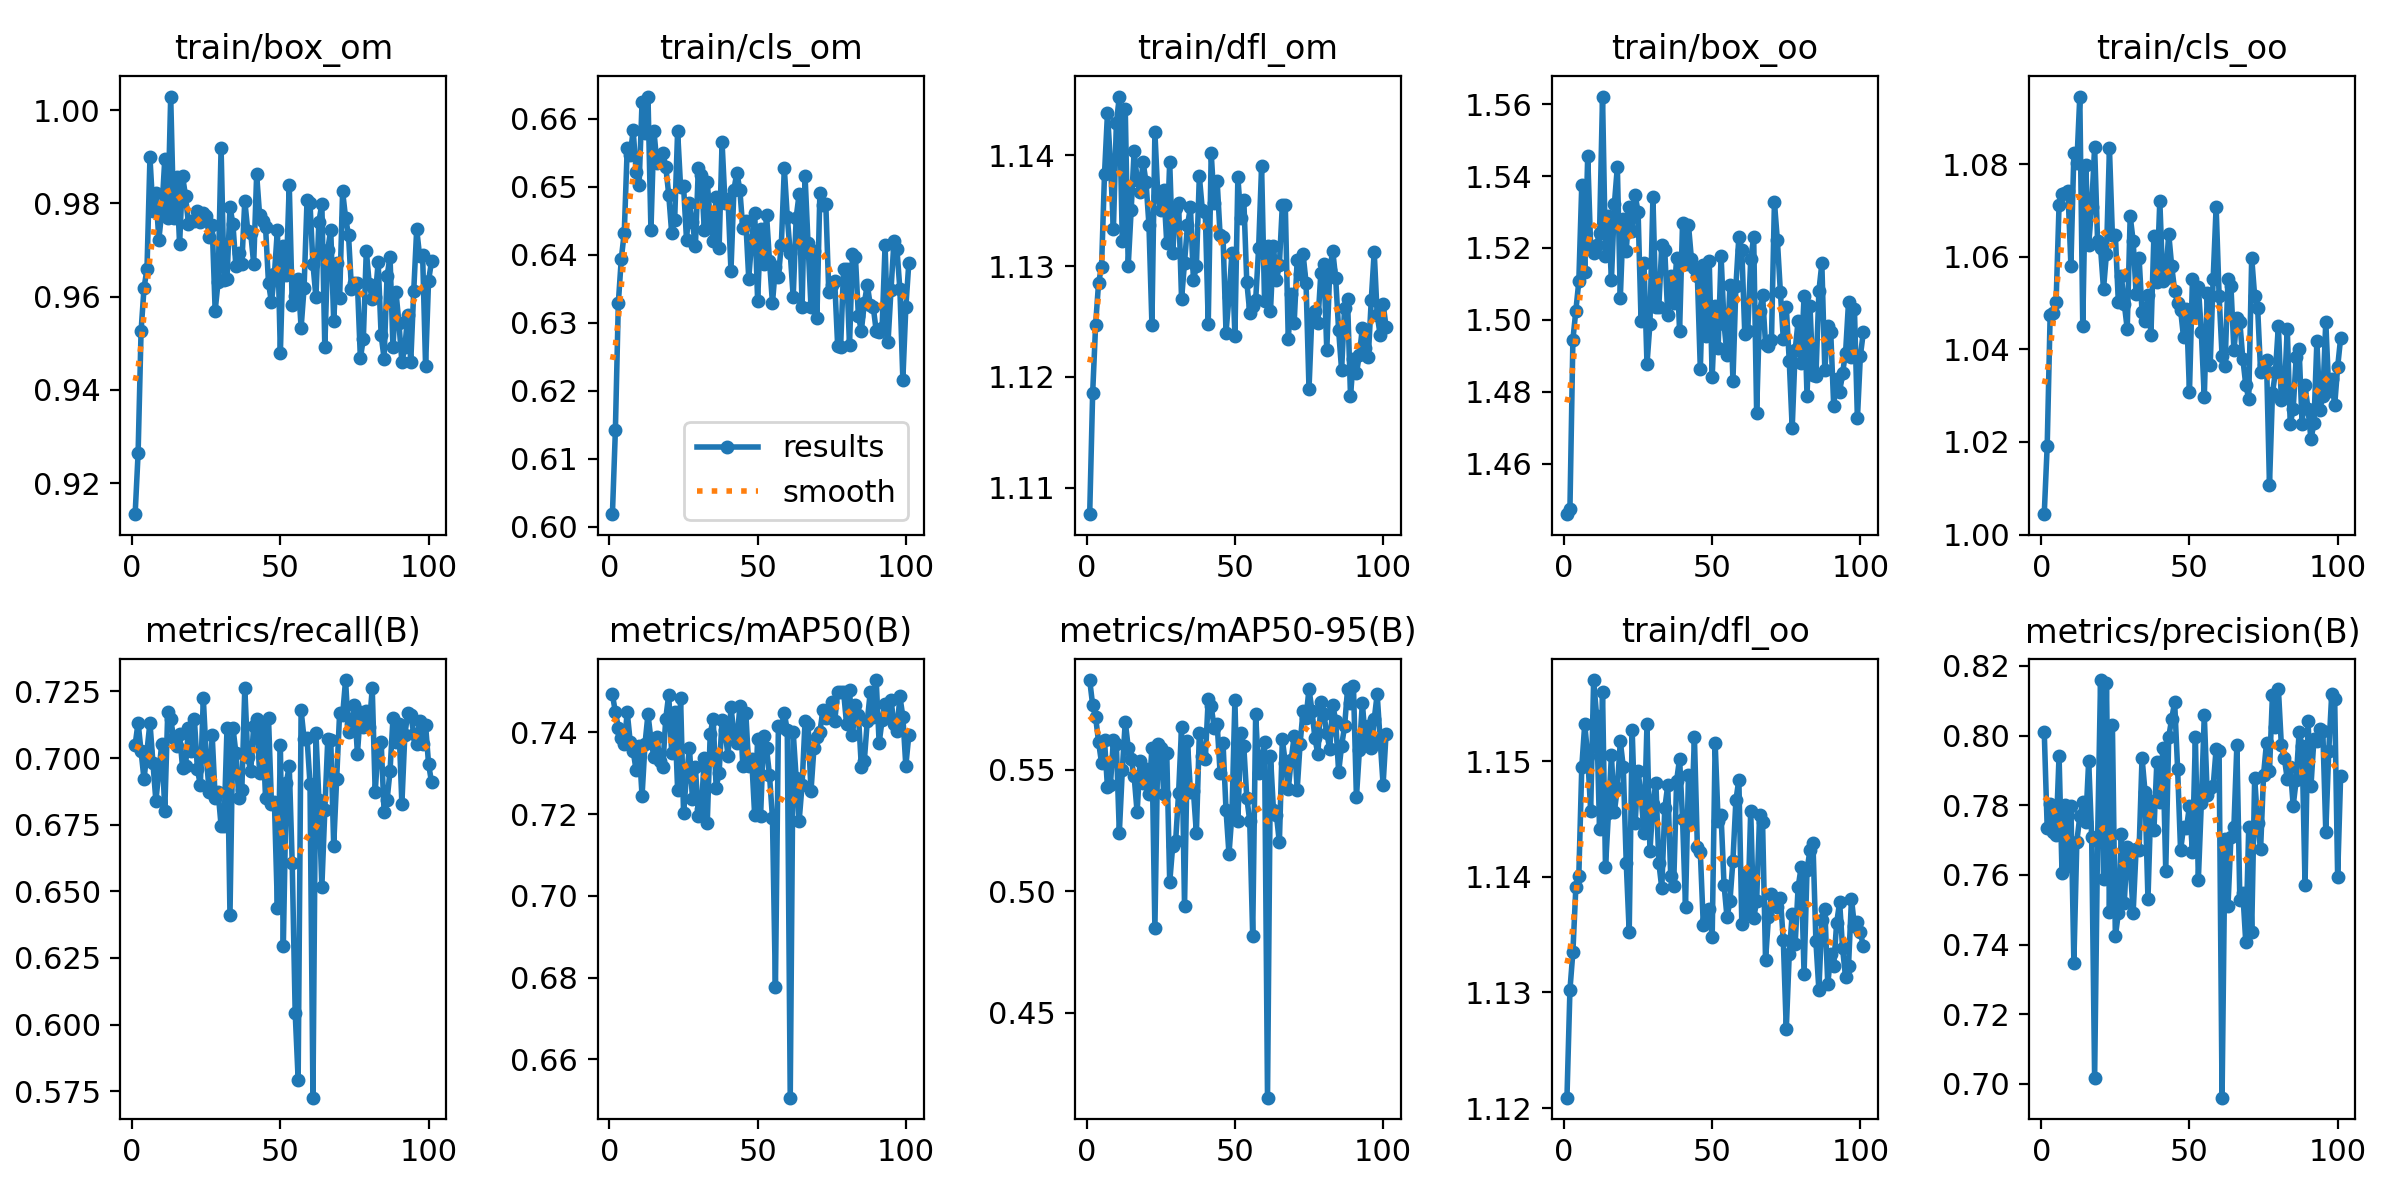

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/train/results.png', width=1400)

## 4.4. Configuração do Modelo YOLOv10 e Preparação de Dataset com Supervision

In [20]:
from ultralytics import YOLOv10

# Carrega o modelo YOLOv10 treinado
model = YOLOv10(f'{HOME}/train/weights/best.pt')

# Prepara o dataset para anotação
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{HOME}/database_projeto_fazenda_netcon/valid/images',
    annotations_directory_path=f'{HOME}/database_projeto_fazenda_netcon/valid/labels',
    data_yaml_path=f'{HOME}/database_projeto_fazenda_netcon/data.yaml'
)

# Inicializa os anotadores de caixas delimitadoras e de rótulos
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()


## 4.5. Testes com um dataset de folhas aleatório

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 320x320 1 Folha, 3 Fungos, 19.4ms
Speed: 2.7ms preprocess, 19.4ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 320)


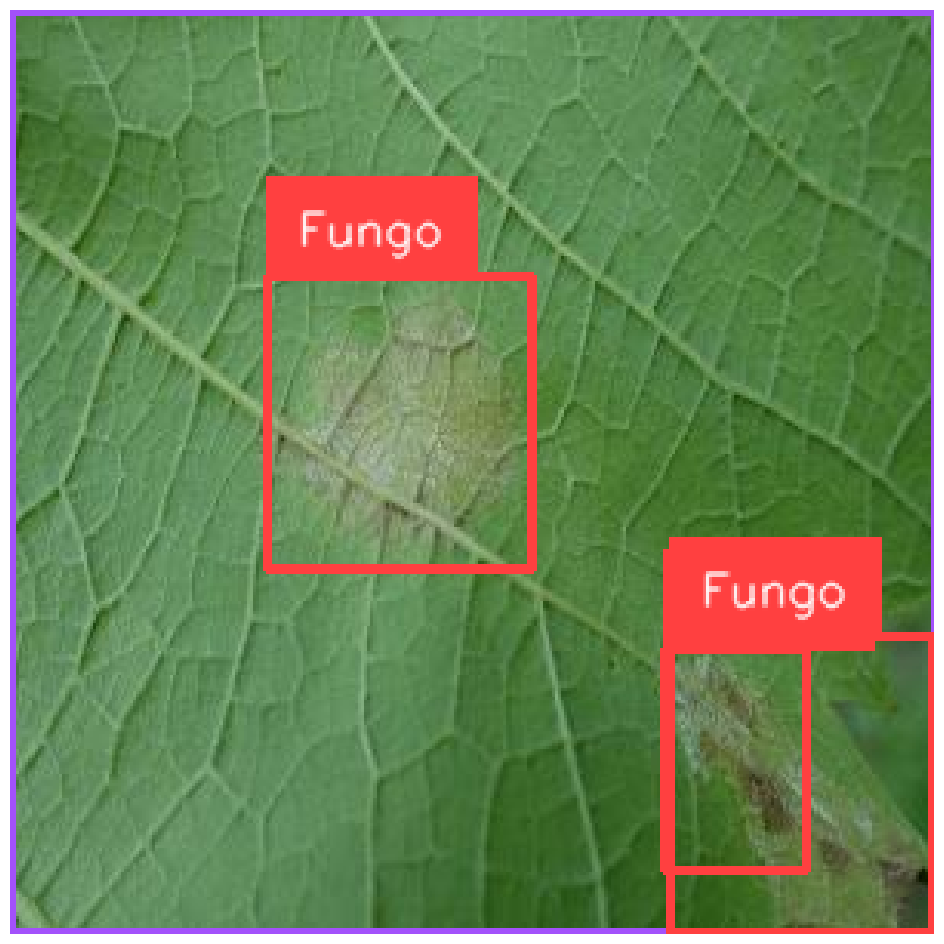

In [27]:
import random
import os

# Seleciona uma imagem aleatória do dataset
random_image_key = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image_key]

# Realiza a detecção de objetos na imagem selecionada
results = model(source=random_image, conf=0.25)[0]

# Converte os resultados das detecções para o formato utilizado pela biblioteca Supervision
detections = sv.Detections.from_ultralytics(results)

# Anota a imagem com as caixas delimitadoras
annotated_image = bounding_box_annotator.annotate(scene=random_image, detections=detections)

# Anota a imagem com os rótulos
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Exibe a imagem anotada
sv.plot_image(annotated_image)
